In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

How many rows and columns are in `gdp_df`? 7176 rows × 4 columns

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


What are the data types of each column? object

In [4]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [6]:
gdp_df.columns = ['Country','Year', 'GDP_Per_Capita']

In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [8]:
%who

gdp_df	 np	 pd	 plt	 sns	 


In [9]:
#sorting group by & count
gdp_df.groupby ('Country').count()

,Year,GDP_Per_Capita
Country,,
Afghanistan,19,19
Africa Eastern and Southern,31,31
Africa Western and Central,31,31
Albania,31,31
Algeria,31,31
...,...,...
Vietnam,31,31
West Bank and Gaza,27,27
World,31,31


In [10]:
#sorting out group by & count
gdp_df.groupby ('Country')['Country'].count()

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Country, Length: 242, dtype: int64

In [11]:
info_avail = gdp_df.groupby ('Country')['Country'].value_counts()

In [12]:
type(info_avail)

pandas.core.series.Series

In [13]:
#make series a df
info_avail = info_avail.to_frame()

In [14]:
type(info_avail)

pandas.core.frame.DataFrame

In [15]:
info_avail

,count
Country,
Afghanistan,19
Africa Eastern and Southern,31
Africa Western and Central,31
Albania,31
Algeria,31
...,...
Vietnam,31
West Bank and Gaza,27
World,31


In [16]:
info_avail.columns

Index(['count'], dtype='object')

In [17]:
info_avail.index

Index(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'United States', 'Upper middle income', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Vietnam', 'West Bank and Gaza', 'World', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=242)

In [18]:
info_avail.reset_index()

,Country,count
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


In [19]:
info_avail.sort_values('count', ascending=False) 

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (excluding high income),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10


In [20]:
info_avail = info_avail.reset_index()

In [21]:
info_avail

,Country,count
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


How many countries have data for all years? 
Which countries are missing many years of data? 
Look at the number of observations per year. What do you notice?

In [22]:
#want to group by country, then select where valuecount is 31.
info_avail['count'].value_counts()[31]

205

In [23]:
#no data for all
len(info_avail.loc[info_avail['count']!= 31])

37

In [24]:
#no_data = info_avail.loc[info_avail['count'] == 31, 'Country'].tolist()

GRAPHS: histogram, a density plot, a boxplot, and a violin plot

In [26]:
gdp_2020 = gdp_df.loc[gdp_df.Year==2020]

In [27]:
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

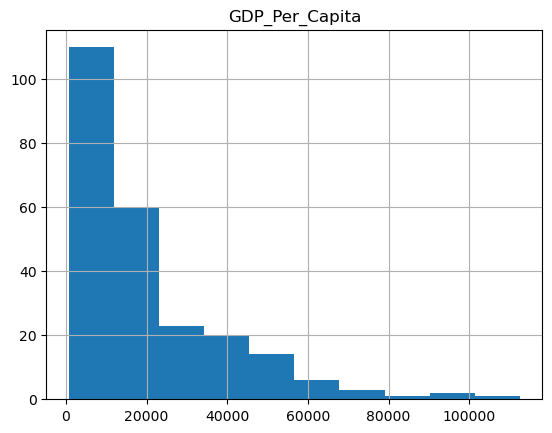

In [28]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: >

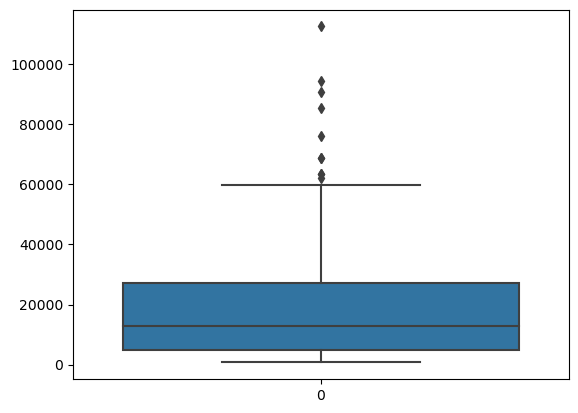

In [29]:
sns.boxplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

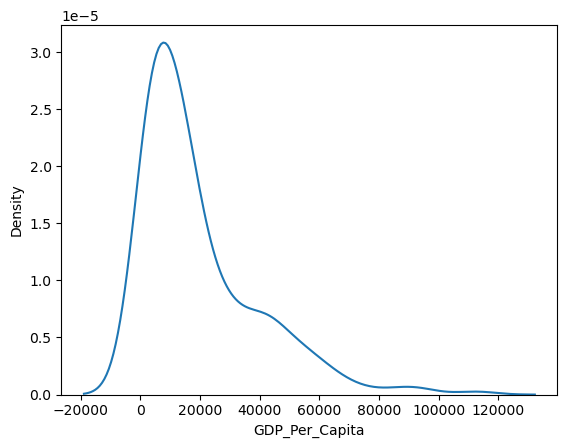

In [30]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: >

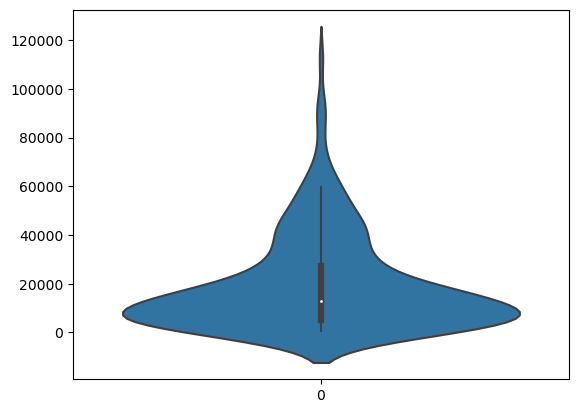

In [31]:
sns.violinplot(gdp_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [32]:
gdp_df['GDP_Per_Capita'].median()

9990.901201288065

10.) compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades

In [33]:
#using this: gdp_2020 = gdp_df.loc[gdp_df.Year==2020] as a template add in the other years for this df

In [34]:
gdp_df.loc[(gdp_df.Year==1990)&(gdp_df.Year==2020)]

,Country,Year,GDP_Per_Capita


In [35]:
gdp_df.loc[gdp_df['Year'].isin(['1990','2000'])]

,Country,Year,GDP_Per_Capita


In [36]:
gdp_df.loc[gdp_df['Year'] == 1990]

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [37]:
gdp_df.loc[gdp_df['Year'] == 2000]

,Country,Year,GDP_Per_Capita
39,Africa Eastern and Southern,2000,2915.472987
70,Africa Western and Central,2000,2690.555839
101,Albania,2000,5892.590548
132,Algeria,2000,8710.444074
163,Angola,2000,4707.954625
...,...,...,...
7045,Vietnam,2000,3649.242659
7076,West Bank and Gaza,2000,4503.248860
7103,World,2000,11140.090244
7134,Zambia,2000,1990.858991


In [38]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]

In [39]:
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


with this dataset, create the following charts & then comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: >

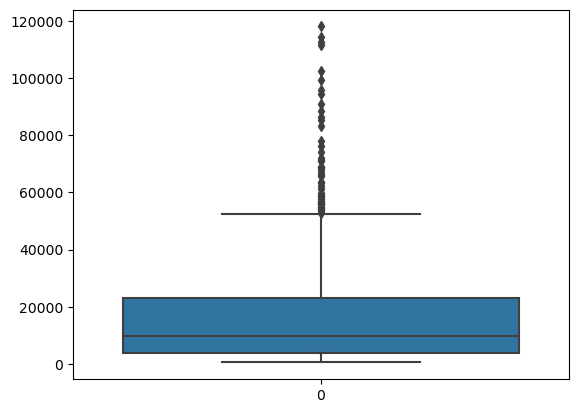

In [40]:
# A boxplot
sns.boxplot(gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

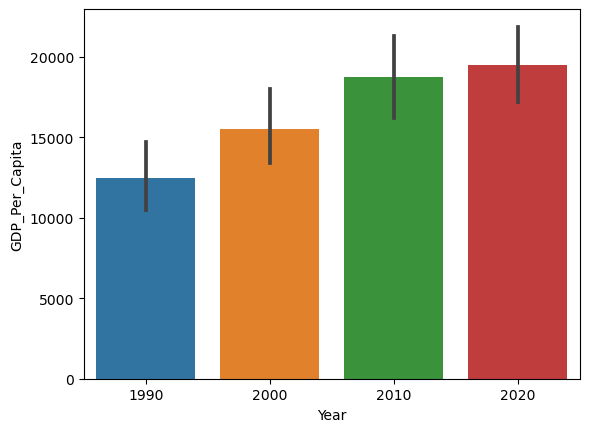

In [55]:
# A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)

In [50]:
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

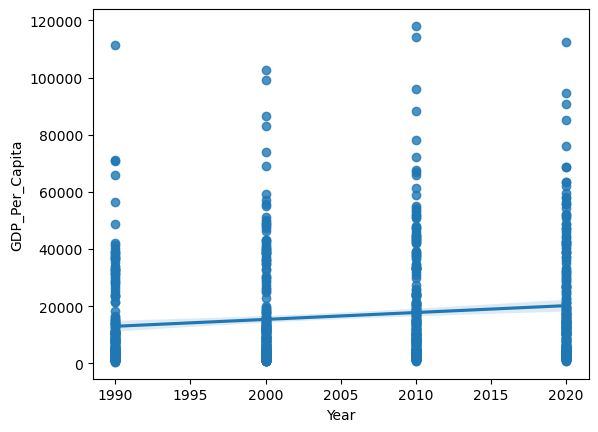

In [52]:
# A scatterplot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

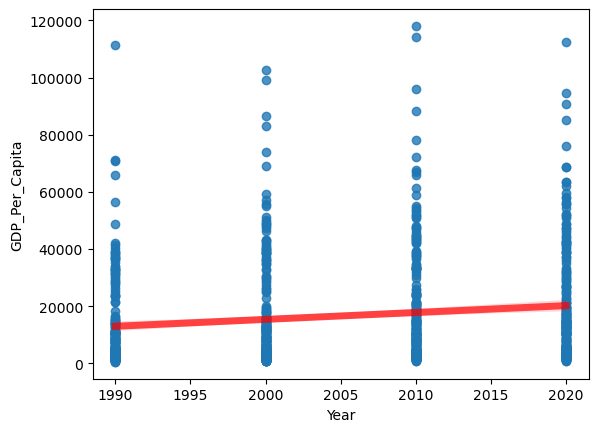

In [56]:
# A scatterplot with a trend line overlaid (see this regplot example: 
#https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})

In [57]:
%who

gdp_2020	 gdp_decades	 gdp_df	 info_avail	 np	 pd	 plt	 sns	 


11. Which country was the first to have a GDP per capita greater than $100,000? United Arab Emirates in 1998

In [61]:
gdp_df.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
4544,Mozambique,1992,436.720371
4543,Mozambique,1993,464.018358
4541,Mozambique,1995,469.189504
4546,Mozambique,1990,471.325103
4542,Mozambique,1994,475.249723
...,...,...,...
3915,"Macao SAR, China",2018,132373.544079
3922,"Macao SAR, China",2011,140321.907954
3921,"Macao SAR, China",2012,149702.441471
3919,"Macao SAR, China",2014,155201.740571


In [62]:
GDPsorted = gdp_df.sort_values(by='GDP_Per_Capita')

In [63]:
GDPsorted[GDPsorted["GDP_Per_Capita"] > 100000]

,Country,Year,GDP_Per_Capita
6830,United Arab Emirates,1998,100100.435658
6834,United Arab Emirates,1994,100213.156226
3901,Luxembourg,2001,101143.147977
6833,United Arab Emirates,1995,101570.992100
6832,United Arab Emirates,1996,102211.638844
6828,United Arab Emirates,2000,102494.714624
3900,Luxembourg,2002,103317.331098
6836,United Arab Emirates,1992,103470.924576
3899,Luxembourg,2003,104743.000088
6831,United Arab Emirates,1997,105108.996265


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [68]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    112557.309472
Name: 3882, dtype: object

In [76]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [83]:
luxembourg = gdp_df.loc[gdp_df.Country=='Luxembourg']

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

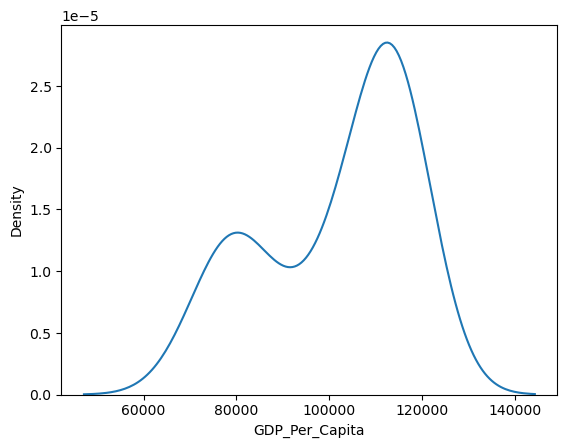

In [84]:
sns.kdeplot(luxembourg['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [70]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    731.064074
Name: 914, dtype: object

In [85]:
burundi = gdp_df.loc[gdp_df.Country=='Burundi']

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

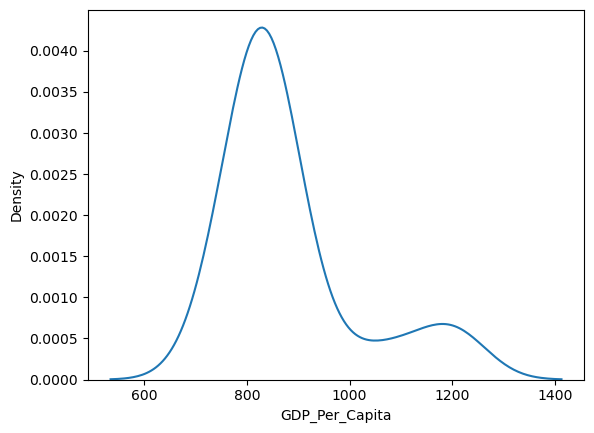

In [86]:
sns.kdeplot(burundi['GDP_Per_Capita'])

13.) **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [89]:
gdp_90v20 = gdp_df[gdp_df["Year"].isin([1990, 2020])]
gdp_90v20

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129
...,...,...,...
7113,World,1990,9704.621768
7114,Zambia,2020,3277.816510
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
